In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
%matplotlib inline

In [2]:
df = pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

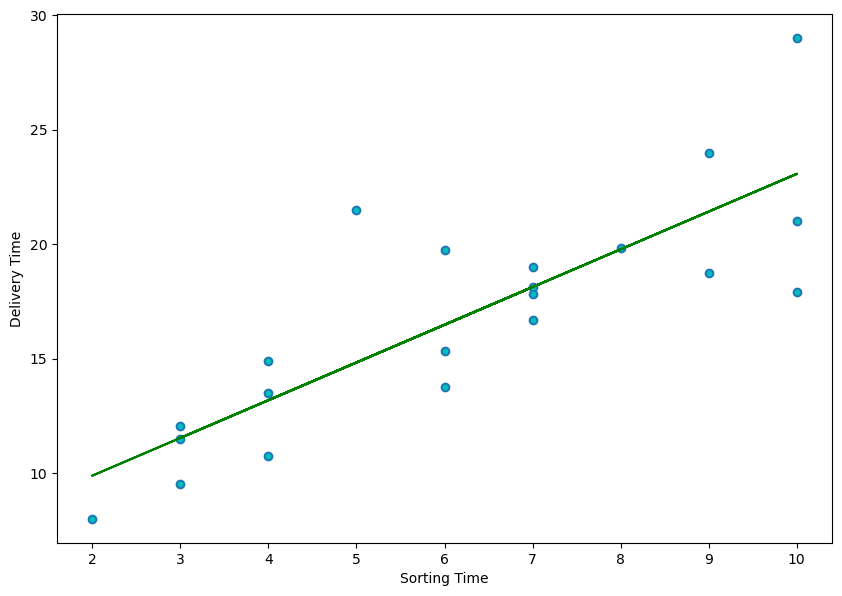

In [5]:
plt.figure(figsize=(10,7), dpi = 100)
b,m= polyfit(df['Sorting Time'], df['Delivery Time'],1)
plt.scatter(df['Sorting Time'], df['Delivery Time'])
plt.plot(df['Sorting Time'], df['Delivery Time'], '.', color ='c')
plt.plot(df['Sorting Time'], b+m*df['Sorting Time'], '-', color='Green')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [6]:
x = df['Sorting Time']
y = df['Delivery Time']

In [7]:
model = sm.OLS(y,x).fit()
prediction = model.predict(x)

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Tue, 01 Mar 2022   Prob (F-statistic):                    6.12e-15
Time:                        15:28:07   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
def gaussian_check(df, variable):
    plt.figure(figsize=(10,5), dpi = 100)
    plt.subplot(1,2,1)
    sns.distplot(df['Sorting Time'])
    
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist='norm', plot=plt)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


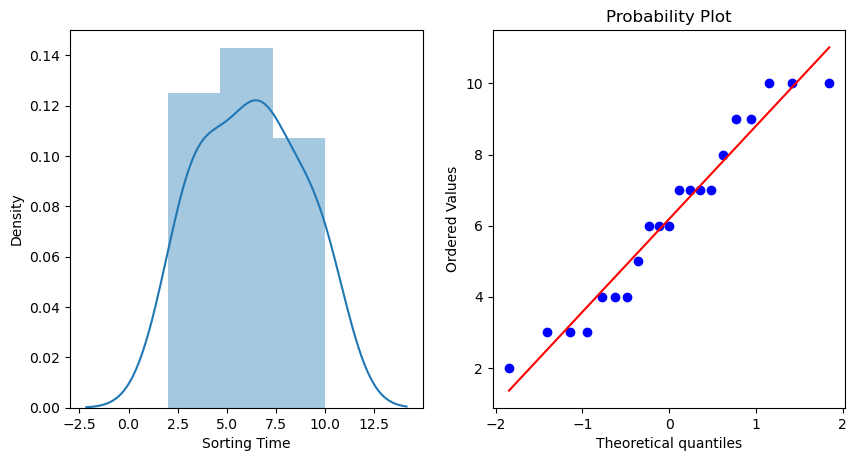

In [10]:
gaussian_check(df, 'Sorting Time')

## 1. Log transformation

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


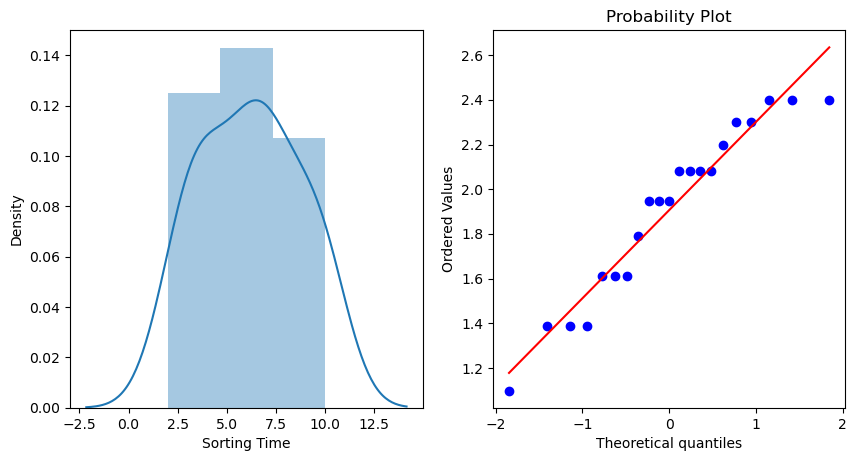

In [11]:
df['Log_sorting'] = np.log(df['Sorting Time']+1) 
gaussian_check(df, 'Log_sorting')

In [12]:
log_model = sm.OLS(y, df['Log_sorting']).fit()
log_predcit = log_model.predict()

In [13]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              740.0
Date:                Tue, 01 Mar 2022   Prob (F-statistic):                    2.84e-17
Time:                        15:28:07   Log-Likelihood:                         -51.716
No. Observations:                  21   AIC:                                      105.4
Df Residuals:                      20   BIC:                                      106.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Log_sorting     8.8899      0.327     27.204      0.000       8.208       9.572
==============================================================================
Omnibus:                        8.747   Durbin-Watson:                   1.390
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                6.273
Skew:                           1.225   Prob(JB):                       0.0434
Kurtosis:                       4.081   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2. Reciprocal Transformation

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


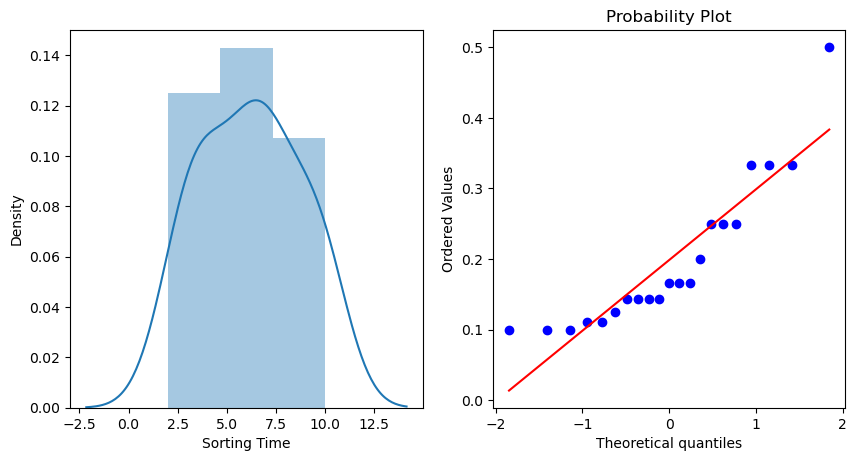

In [14]:
df['Rec_sorting'] = 1/df['Sorting Time']
gaussian_check(df, 'Rec_sorting')

In [15]:
rec_model = sm.OLS(y, df['Rec_sorting']).fit()
rec_predict = rec_model.predict(df['Rec_sorting'])

In [16]:
rec_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.562
Model:                            OLS   Adj. R-squared (uncentered):              0.540
Method:                 Least Squares   F-statistic:                              25.61
Date:                Tue, 01 Mar 2022   Prob (F-statistic):                    5.98e-05
Time:                        15:28:08   Log-Likelihood:                         -81.255
No. Observations:                  21   AIC:                                      164.5
Df Residuals:                      20   BIC:                                      165.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Rec_sorting    58.7739     11.614      5.061      0.000      34.548      83.000
==============================================================================
Omnibus:                        3.037   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.219   Jarque-Bera (JB):                1.876
Skew:                          -0.730   Prob(JB):                        0.391
Kurtosis:                       3.102   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3. Square root Transformation

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


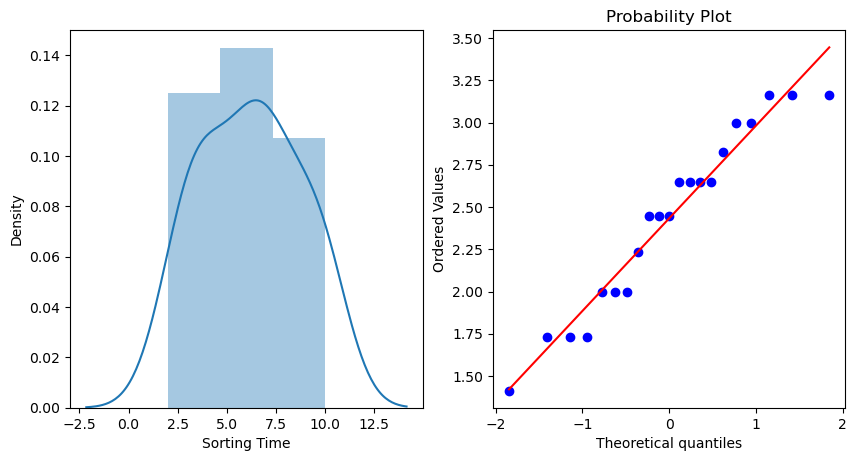

In [17]:
df['sqrt_sorting'] = np.sqrt(df['Sorting Time'])
gaussian_check(df, 'sqrt_sorting')

In [18]:
sqrt_model = sm.OLS(y, df['sqrt_sorting']).fit()
sqrt_predict = sqrt_model.predict(df['sqrt_sorting'])

In [19]:
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              772.0
Date:                Tue, 01 Mar 2022   Prob (F-statistic):                    1.88e-17
Time:                        15:28:08   Log-Likelihood:                         -51.284
No. Observations:                  21   AIC:                                      104.6
Df Residuals:                      20   BIC:                                      105.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sqrt_sorting     6.9466      0.250     27.785      0.000       6.425       7.468
==============================================================================
Omnibus:                        6.818   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.599
Skew:                           1.090   Prob(JB):                        0.100
Kurtosis:                       3.708   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4. Exponential Transformation

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


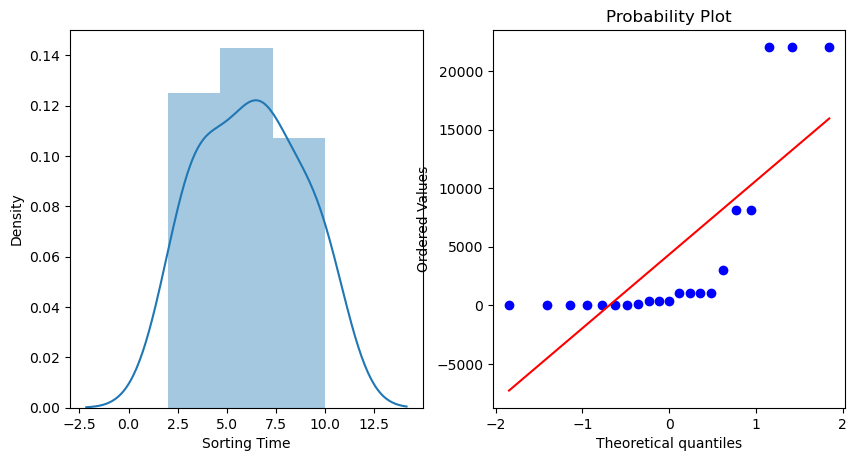

In [20]:
df['exp_sorting'] = np.exp(df['Sorting Time'])
gaussian_check(df, 'exp_sorting')

In [21]:
exp_model = sm.OLS(y, df['exp_sorting']).fit()
exp_predict = exp_model.predict(df['exp_sorting'])

In [22]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.390
Model:                            OLS   Adj. R-squared (uncentered):              0.360
Method:                 Least Squares   F-statistic:                              12.80
Date:                Tue, 01 Mar 2022   Prob (F-statistic):                     0.00188
Time:                        15:28:08   Log-Likelihood:                         -84.716
No. Observations:                  21   AIC:                                      171.4
Df Residuals:                      20   BIC:                                      172.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
exp_sorting     0.0013      0.000      3.578      0.002       0.001       0.002
==============================================================================
Omnibus:                       12.232   Durbin-Watson:                   0.482
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.064
Skew:                          -1.488   Prob(JB):                      0.00653
Kurtosis:                       4.625   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5. Boxcox Transformation

Optimal lambda:  0.6880660292932914


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


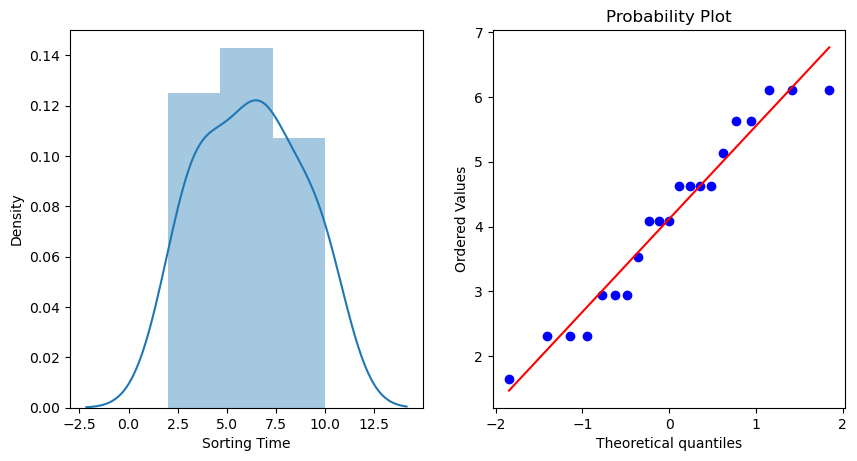

In [23]:
df['Boxcox_sorting'], param = stats.boxcox(df['Sorting Time']+1)

print('Optimal lambda: ', param)

gaussian_check(df, 'Boxcox_sorting')

In [24]:
boxcox_model = sm.OLS(y, df['Boxcox_sorting']).fit()
box_predict = boxcox_model.predict(df['Boxcox_sorting'])

In [25]:
boxcox_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              629.2
Date:                Tue, 01 Mar 2022   Prob (F-statistic):                    1.38e-16
Time:                        15:28:09   Log-Likelihood:                         -53.372
No. Observations:                  21   AIC:                                      108.7
Df Residuals:                      20   BIC:                                      109.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Boxcox_sorting     3.9734      0.158     25.083      0.000       3.643       4.304
==============================================================================
Omnibus:                        0.638   Durbin-Watson:                   1.326
Prob(Omnibus):                  0.727   Jarque-Bera (JB):                0.032
Skew:                           0.041   Prob(JB):                        0.984
Kurtosis:                       3.171   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**CONCLUSION**
- R-squared before trasnformation = 0.955
- LOG TRANSFORMATION R-squared = 0.974
- RECIPROCAL TRANSFORMATION R-squared = 0.562
- SQUARE ROOT TRANSFORMATION R-sqaured = 0.975
- EXPONENTIAL TRANSFORMATION R-squared = 0.390
- BOXCOX TRANSFORMATION R-sqaured = 0.969

**We can use Square root transformation as it is giving the best score of 0.975**